# Derivations of correction factors $\alpha$

Start by importing some packages and defining some functions.

In [1]:
import sympy
from matplotlib import pyplot as plt
import numpy as np
from sympy.abc import epsilon, sigma, tau, c, n, p, q, z
from sympy import Max, Abs, binomial, hyper

Define variables $\Delta~t_{\tau}$, $\ell_F$, and $\ell_F$ in sympy

In [2]:
dtt = sympy.symbols('\Delta~t_tau')
lf = sympy.symbols('ell_F')
lb = sympy.symbols('ell_B')

Derive contributions to ${\bf S}^{(0)}$ and lag-1 covariance ${\bf S}^{(1)}$

In [4]:
lmax1 = Max(lb,lf)+1
ldiff = Abs(lf-lb)
phi = dtt**(lb+lf+1)*(1-dtt)**(ldiff)*binomial(lmax1-1,ldiff)*hyper((lmax1, lmax1),[ldiff+1], (1-dtt)**2)
contribution0 = tau*sigma**2/n*epsilon**(lb+lf)*phi
contribution1 = (1-dtt)*contribution0 + epsilon*dtt*contribution0.subs(lb,lf-1)

Derive correction factors $\alpha^{(\textrm{LCCF})}$ and $\alpha^{(\textrm{LCRC})}$

In [5]:
alpha_cf = contribution1.subs([(lb,1),(lf,1)])/contribution0.subs([(lb,1),(lf,1)])
alpha_rc = contribution1.subs([(lb,1),(lf,0)])/contribution0.subs([(lb,1),(lf,0)])
alpha_rc = alpha_rc.simplify()
alpha_cf = alpha_cf.simplify()
alpha_rc = sympy.factor(alpha_rc)
alpha_cf = sympy.factor(alpha_cf)

Show results

In [6]:
# expression for alpha LCCF
alpha_cf

-2*(\Delta~t_tau - 1)/(\Delta~t_tau**2 - 2*\Delta~t_tau + 2)

Sanity check: do I get the same result using the equation in manuscript? (yes!)

In [8]:
step = (phi.subs([(lb,1),(lf,0)])/phi.subs([(lb,1),(lf,1)])).simplify().factor()
(1-dtt*(1-step)).simplify().factor()

-2*(\Delta~t_tau - 1)/(\Delta~t_tau**2 - 2*\Delta~t_tau + 2)

Plot correction terms

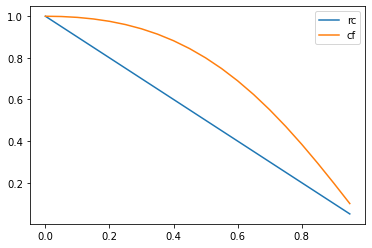

In [20]:
numrange = np.arange(0,1,0.05)
data_rc = [float(alpha_rc.subs(dtt, num)) for num in numrange]
data_cf = [float(alpha_cf.subs(dtt, num)) for num in numrange]
plt.plot(numrange, data_rc, label='rc')
plt.plot(numrange, data_cf, label='cf')
plt.legend()